# Costo de Seguro Médico

El siguiente análisis modela la relación entre diversas variables vinculadas a la salud y el costo de seguro médico de una muestra de usuarios de Estados Unidos. El dataset utilizado se encuentra disponible en https://www.kaggle.com/awaiskaggler/insurance-csv.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de dataset

In [2]:
df = pd.read_csv(r"./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

### Preprocesado de datos

In [4]:
df.sex.unique(), df.smoker.unique(), df.region.unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [5]:
df1 = df
categoricas = ["sex", "smoker", "region"]

for var in categoricas:
    dummies = pd.get_dummies(df[var], prefix=var)
    df1 = pd.concat([df1, dummies], axis = 1)

df1 = df1.drop(categoricas, axis = 1)
df1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
df1.shape

(1338, 12)

In [7]:
df = df1

El dataset presenta 1338 muestras y 12 columnas, de las cuales 3 son predictoras iniciales, 8 son dummies y 1 es target.

### Declaración de variables predictoras y target

In [8]:
target = ["charges"]
predictoras = [x for x in df.columns.values if x not in target]

x = df[predictoras]
y = df[target]

### Visualización en gráfico de dispersión

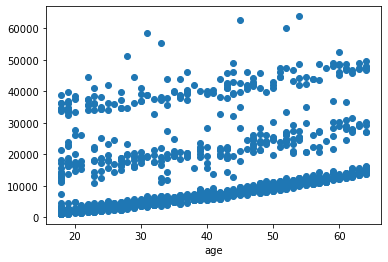

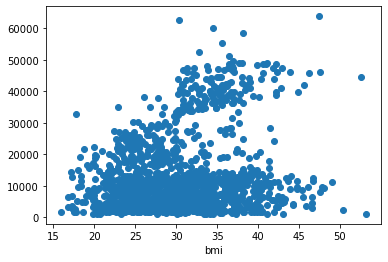

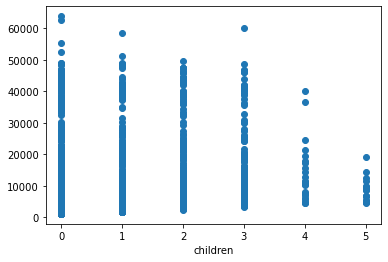

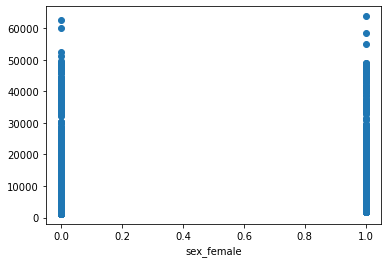

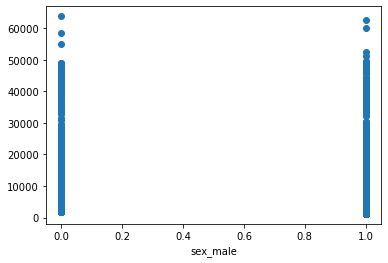

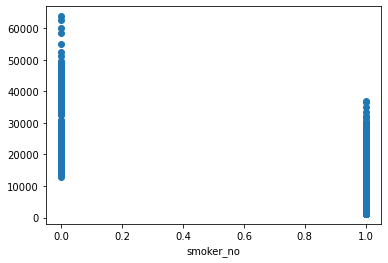

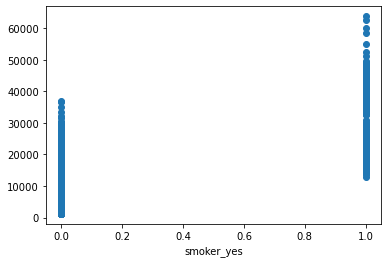

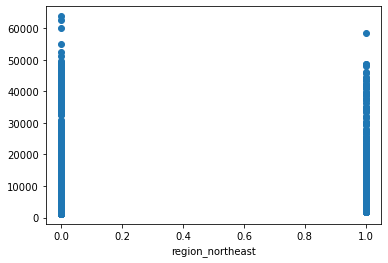

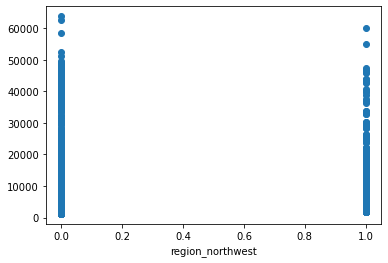

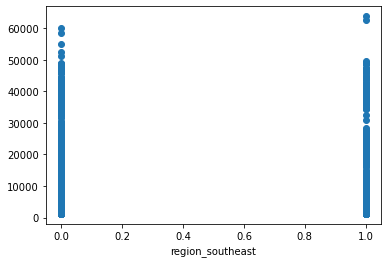

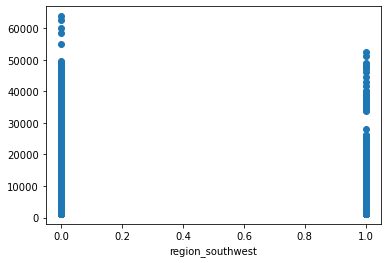

In [9]:
for var in x.columns.values:
    plt.scatter(x[var], y)
    plt.xlabel(var)
    plt.show()

### Modelado con PyTorch

In [10]:
x = np.array(x)
y = np.array(y)

x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

n_samples, n_features = x.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer 

    # (Algorithms: Adadelta, Adagrad, Adam, AdamW, SparseAdam (for sparse tensors), 
                 # Adamax, ASGD, LBFGS (closure issue), RMSprop, Rprop, SGD)

learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# 3) training loop

num_epochs = 2000000

for epoch in range(num_epochs):
    
    # forward pass and loss
    
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    
    loss.backward()
    
# update
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1)%100000==0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.16f}")
        
predicted = model(x).detach().numpy()

print("R2 Score:", r2_score(y, predicted)*100 , "%")

epoch: 100000, loss = 115708384.0000000000000000
epoch: 200000, loss = 101382760.0000000000000000
epoch: 300000, loss = 88981440.0000000000000000
epoch: 400000, loss = 77991416.0000000000000000
epoch: 500000, loss = 68467984.0000000000000000
epoch: 600000, loss = 60222704.0000000000000000
epoch: 700000, loss = 53205024.0000000000000000
epoch: 800000, loss = 47414952.0000000000000000
epoch: 900000, loss = 42852476.0000000000000000
epoch: 1000000, loss = 39517612.0000000000000000
epoch: 1100000, loss = 37410344.0000000000000000
epoch: 1200000, loss = 36530680.0000000000000000
epoch: 1300000, loss = 36501892.0000000000000000
epoch: 1400000, loss = 36501892.0000000000000000
epoch: 1500000, loss = 36501892.0000000000000000
epoch: 1600000, loss = 36501892.0000000000000000
epoch: 1700000, loss = 36501892.0000000000000000
epoch: 1800000, loss = 36501892.0000000000000000
epoch: 1900000, loss = 36501892.0000000000000000
epoch: 2000000, loss = 36501892.0000000000000000
R2 Score: 75.09130385309444